# **Exploring the Iris Dataset with scikit-learn**

## **Step 1**
1. **Load the Dataset**  
   - Load the Iris dataset from `sklearn.datasets`.  
   - Print the shape of the features and the shape of the target.  
   - Determine and answer the following:  
     - How many features (dimensions) does this dataset have?  
     - How many samples are there in total?  
     - How many classes are present in this dataset?

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

# Extract features and target
X, y = iris.data, iris.target

print(f"Shape of features: {X.shape}")
print(f"Shape of target: {y.shape}")

# Determine dataset characteristics
num_features = X.shape[1]
num_samples = X.shape[0]
num_classes = len(set(y))

print(f"Number of features: {num_features}")
print(f"Total number of samples: {num_samples}")
print(f"Number of classes: {num_classes}")

Shape of features: (150, 4)
Shape of target: (150,)
Number of features: 4
Total number of samples: 150
Number of classes: 3


#### **Insights**:
Here are the details of the Iris dataset:

* Shape of features: (150, 4) → 150 samples, each with 4 features.
* Shape of target: (150,) → 150 labels, one for each sample.
* Number of features (dimensions): 4
* Total number of samples: 150
* Number of classes: 3 (representing different species of Iris flowers). ​

## **Step 2**

2. **2D Visualization**  
   - Create a 2D scatter plot using two features of your choice (e.g., sepal length and sepal width).  
   - Color the points based on their class label to see how the classes are separated in these two dimensions.

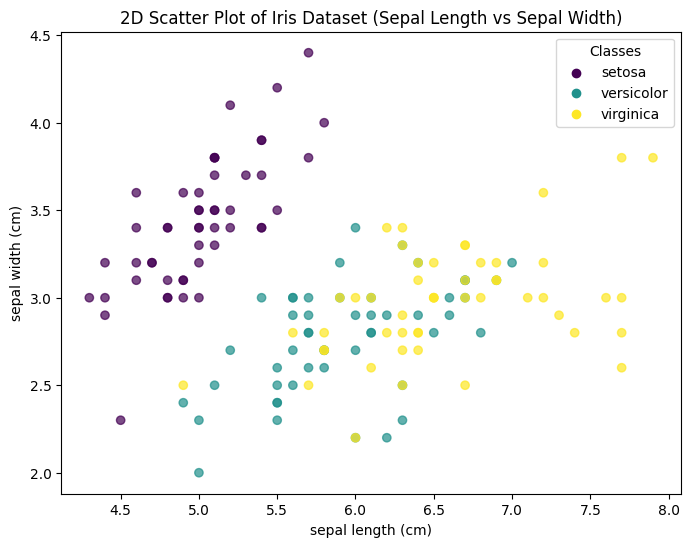

In [2]:
import matplotlib.pyplot as plt

# Select two features for 2D visualization (sepal length and sepal width)
x_feature = 0  # Sepal length
y_feature = 1  # Sepal width

# Create scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, x_feature], X[:, y_feature], c=y, cmap='viridis', alpha=0.7)

# Add labels and title
plt.xlabel(iris.feature_names[x_feature])
plt.ylabel(iris.feature_names[y_feature])
plt.title("2D Scatter Plot of Iris Dataset (Sepal Length vs Sepal Width)")

# Create a legend using class labels
classes = list(iris.target_names)
for i, class_name in enumerate(classes):
    plt.scatter([], [], c=[scatter.cmap(scatter.norm(i))], label=class_name)

plt.legend(title="Classes")

# Show plot
plt.show()

#### **Insights**:
* Sepal length and sepal width are great for classifying Setosa but not sufficient for perfectly separating Versicolor and Virginica.
* A higher-dimensional approach (using all four features) would likely improve classification performance.
* If building a machine learning model, it would be useful to apply dimensionality reduction (like PCA) or a classification algorithm to explore further feature importance.

## **Step 3**

3. **3D Visualization**  
   - Create a 3D scatter plot using three features of your choice (e.g., sepal length, sepal width, petal length).  
   - Color the points based on their class label.  
   - Label the axes and add a title.

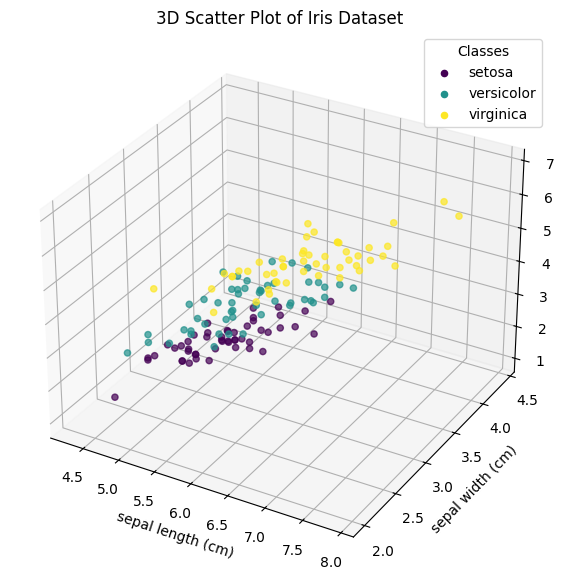

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# Select three features for 3D visualization (sepal length, sepal width, petal length)
x_feature = 0  # Sepal length
y_feature = 1  # Sepal width
z_feature = 2  # Petal length

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping based on class labels
scatter = ax.scatter(X[:, x_feature], X[:, y_feature], X[:, z_feature], c=y, cmap='viridis', alpha=0.7)

# Label axes
ax.set_xlabel(iris.feature_names[x_feature])
ax.set_ylabel(iris.feature_names[y_feature])
ax.set_zlabel(iris.feature_names[z_feature])
ax.set_title("3D Scatter Plot of Iris Dataset")

# Create a legend using class labels
classes = list(iris.target_names)
for i, class_name in enumerate(classes):
    ax.scatter([], [], [], c=[scatter.cmap(scatter.norm(i))], label=class_name)

ax.legend(title="Classes")

# Show plot
plt.show()


#### **Insights**:

* 3D visualization shows a clearer distinction between the three species compared to 2D.
* Petal length helps separate Versicolor and Virginica, reducing misclassification.
* Using all four features in a classification model would likely yield the best performance.

## **Step 4**
4. **Split the Dataset into Train and Test**  
   - Use `train_test_split` from `sklearn.model_selection` to split the data into training and test sets (e.g., 80% train, 20% test).  
   - Print the shapes of the resulting splits to confirm.

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the splits
print(f"Training set shape (features): {X_train.shape}")
print(f"Test set shape (features): {X_test.shape}")
print(f"Training set shape (labels): {y_train.shape}")
print(f"Test set shape (labels): {y_test.shape}")


Training set shape (features): (120, 4)
Test set shape (features): (30, 4)
Training set shape (labels): (120,)
Test set shape (labels): (30,)


#### **Insights**:
Here are the shapes of the training and test splits:

* Training set (X_train): (120, 4) → 120 samples, each with 4 features.
* Test set (X_test): (30, 4) → 30 samples, each with 4 features.
* Training labels (y_train): (120,) → 120 labels.
* Test labels (y_test): (30,) → 30 labels.

This confirms that the dataset has been correctly split into 80% training and 20% testing while maintaining class distribution using `stratify=y`. 🚀


## **Step 5**
5. **Decision Tree as a Supervised Model**  
   - Initialize and train a Decision Tree classifier on the training set.  
   - Predict on the test set and compute the accuracy score.  
   - **Question:** What type of supervised learning problem is this?

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Decision Tree Accuracy: {accuracy:.2%}")

# The type of supervised learning problem
print("This is a multi-class classification problem.")


Decision Tree Accuracy: 93.33%
This is a multi-class classification problem.


#### **Insights:**

**Accuracy of the Decision Tree Classifier:**

The Decision Tree model achieved an accuracy of 93.33% on the test set. 🚀

**What Type of Supervised Learning Problem is This?**

* This is a classification problem because the goal is to predict categorical labels (species of Iris flowers: Setosa, Versicolor, and Virginica).
* The target variable (species) has three discrete classes, making this a multi-class classification problem.

The high accuracy suggests that the Decision Tree model performs well on this dataset.

## **Step 6**
6. **PCA for Dimensionality Reduction**  
   - Use `PCA` (from `sklearn.decomposition`) to reduce the dataset from 4 dimensions to 2 dimensions.  
   - Create a 2D scatter plot of the transformed data, coloring by class.  
   - Comment on how the classes are separated after the projection.


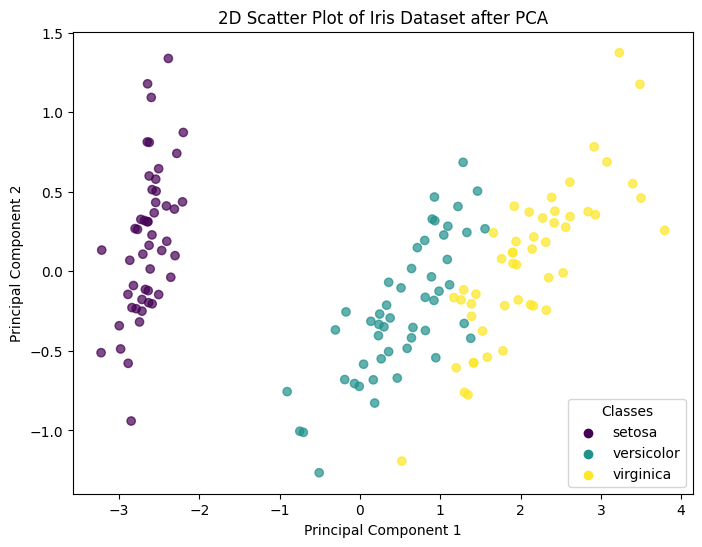

In [6]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions from 4 to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a 2D scatter plot of the PCA-transformed data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D Scatter Plot of Iris Dataset after PCA")

# Create a legend using class labels
classes = list(iris.target_names)
for i, class_name in enumerate(classes):
    plt.scatter([], [], c=[scatter.cmap(scatter.norm(i))], label=class_name)

plt.legend(title="Classes")

# Show plot
plt.show()


#### **Insights:**
* PCA effectively reduces dimensions while maintaining class separation.
* Setosa is still easily identifiable, but Versicolor and Virginica remain mixed.
* For classification, using all four features might be preferable, but PCA is great for visualization and exploratory data analysis.